In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
drugchem_csv = pd.read_csv('ctrp_drug.csv', index_col = 0) # 459 drugs, 1444 chemical compounds
cellexp_csv = pd.read_csv('ctrp_exp.csv', index_col = 0) # 830 cell lines, 19144 gene expressions
resp_csv = pd.read_csv('ctrp_auc.csv', index_col = 0) #459 drugs, 830 cell lines -> Drug responses

drugbank = pd.read_csv('drugbank.csv', index_col = 0) #new test drug sets


In [3]:
resp_csv = resp_csv.reindex(sorted(resp_csv.columns), axis=1)
cellnames = resp_csv.columns
drugnames = resp_csv.index
cellexp_csv.sort_index(inplace=True)

In [4]:
resp_csv

,ACH-000002,ACH-000004,ACH-000005,ACH-000006,ACH-000007,ACH-000008,ACH-000009,ACH-000011,ACH-000012,ACH-000013,...,ACH-001086,ACH-001129,ACH-001190,ACH-001239,ACH-001274,ACH-001275,ACH-001277,ACH-001306,ACH-001307,ACH-001318
CTRP:1788,NaN,14.7090,NaN,NaN,14.981,NaN,NaN,14.557,14.201,14.883,...,15.332,NaN,NaN,NaN,NaN,NaN,NaN,14.328,14.657,NaN
CTRP:3588,14.106,13.2720,11.162,NaN,14.063,14.361,12.814,NaN,13.375,13.877,...,14.518,12.768,NaN,10.587,NaN,15.174,15.628,12.616,12.606,10.468
CTRP:12877,14.904,14.1930,13.739,14.0160,14.742,14.890,13.944,14.546,14.036,14.538,...,14.109,14.124,14.895,14.509,15.807,14.373,14.818,14.210,14.140,14.677
CTRP:17712,14.634,14.5130,14.532,NaN,14.302,14.418,13.251,13.969,14.370,14.780,...,14.757,12.040,16.449,12.530,17.125,14.914,15.602,14.332,14.661,13.378
CTRP:18311,13.618,14.2980,14.323,NaN,11.555,NaN,11.413,12.379,14.291,12.836,...,13.374,NaN,13.653,14.399,14.287,13.462,13.760,12.086,13.710,14.336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTRP:688799,14.489,NaN,13.254,NaN,NaN,14.924,13.857,NaN,NaN,NaN,...,NaN,NaN,13.675,13.500,15.167,14.899,13.415,NaN,NaN,13.956
CTRP:688888,10.701,9.9767,10.543,9.2081,10.510,11.997,12.149,12.479,10.834,10.717,...,15.061,8.967,NaN,11.106,11.811,11.972,11.164,10.745,10.461,11.676
CTRP:688962,15.740,NaN,14.575,NaN,NaN,14.718,13.652,NaN,NaN,NaN,...,NaN,NaN,14.336,14.526,13.599,13.148,14.125,NaN,NaN,14.795
CTRP:705300,11.682,16.9170,16.538,12.0540,11.212,14.383,13.265,14.414,15.704,14.556,...,15.543,13.731,14.999,14.694,12.413,13.007,13.562,14.621,14.470,14.660


In [5]:
drugchem_csv

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
CTRP:1788,0,1.5433,2.381775,57.0721,50.477481,11,12,39,22,17,...,9.026848,44.842777,2.038308,17.372722,2.558052,5.951131,1133.0,33.0,2.840,116.0
CTRP:3588,0,0.4400,0.193600,57.7318,53.187895,14,15,41,26,15,...,9.391597,53.412804,2.054339,24.054233,8.229337,9.625479,1880.0,38.0,3.756,142.0
CTRP:12877,0,-0.6836,0.467309,13.8218,51.595481,22,25,41,24,17,...,7.588835,51.037912,2.126580,9.911202,0.000000,9.911202,1346.0,39.0,6.267,136.0
CTRP:17712,0,-0.0945,0.008930,23.3659,50.644274,18,20,42,24,18,...,7.574954,50.192104,2.091338,16.027501,3.011897,13.015604,1296.0,37.0,5.661,126.0
CTRP:18311,0,0.9425,0.888306,60.5299,57.644653,13,15,46,25,21,...,10.108807,51.776769,2.071071,17.650160,2.563954,9.976927,1488.0,40.0,3.348,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTRP:688799,0,-0.7019,0.492664,39.6924,61.664653,18,18,52,31,21,...,8.175844,63.585479,2.051144,18.750473,10.539925,3.146843,2954.0,54.0,4.502,164.0
CTRP:688888,0,-0.0182,0.000331,77.1754,68.341825,12,12,58,33,25,...,7.709796,66.535446,2.016226,19.756240,16.331692,3.424548,3752.0,53.0,4.017,164.0
CTRP:688962,0,-0.8922,0.796021,39.3316,51.206274,15,16,43,25,18,...,8.351509,51.895127,2.075805,24.179279,6.127804,15.526087,1510.0,39.0,1.922,134.0
CTRP:705300,0,-1.2237,1.497442,30.2538,67.398239,25,29,55,32,23,...,7.658005,67.125024,2.097657,18.048627,2.438550,15.610077,2923.0,54.0,5.548,186.0


In [6]:
drugchem_csv.iloc[0]

nAcid        0.000000
ALogP        1.543300
ALogp2       2.381775
AMR         57.072100
apol        50.477481
             ...     
WTPT-5       5.951131
WPATH     1133.000000
WPOL        33.000000
XLogP        2.840000
Zagreb     116.000000
Name: CTRP:1788, Length: 1444, dtype: float64

In [7]:
cellexp_csv

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,SCYGR3 (112441429),SCYGR7 (112441438),OR8S1 (341568),SCYGR6 (112441431),OR4F29 (729759),EEF1AKMT4 (110599564),TBCE (6905),OOSP4A (112577462),ARHGAP11B (89839),OOSP3 (112577461)
ACH-000002,0.189034,0.000000,5.633431,1.263034,3.152183,4.189034,0.163499,4.161888,4.139961,2.799087,...,0.0,0.0,0.000000,0.0,0.000000,3.876762,4.686501,0.000000,1.761285,0.028569
ACH-000004,2.599318,0.000000,5.310340,2.467279,3.926948,0.918386,4.957915,3.912650,4.878725,4.971314,...,0.0,0.0,0.042644,0.0,0.000000,3.826803,4.895787,1.613532,2.704872,0.000000
ACH-000005,3.051372,0.000000,5.754888,2.969012,5.322289,0.214125,5.762880,4.152995,5.532629,5.330558,...,0.0,0.0,0.000000,0.0,0.014355,3.571677,5.349436,1.389567,2.580145,0.097611
ACH-000006,0.163499,0.000000,6.115200,2.769772,4.205549,3.871844,3.942045,5.267910,4.840967,5.084064,...,0.0,0.0,0.000000,0.0,0.000000,3.878725,5.087887,0.070389,3.700440,0.042644
ACH-000007,4.031219,0.000000,5.856239,3.072106,3.716991,0.028569,0.014355,5.542568,4.964861,3.957915,...,0.0,0.0,0.000000,0.0,0.042644,3.785551,4.636915,0.163499,2.217231,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-001275,4.338424,2.169925,6.280585,2.584963,4.025915,0.014355,0.056584,4.823749,3.553361,4.502712,...,0.0,0.0,0.000000,0.0,0.000000,2.117695,4.809414,0.000000,1.310340,0.000000
ACH-001277,5.966246,2.179511,6.942045,2.935460,4.323370,0.000000,6.386121,5.108524,4.295723,4.595146,...,0.0,0.0,0.000000,0.0,0.000000,2.859970,5.311430,0.000000,2.419539,0.000000
ACH-001306,4.285402,0.000000,6.880686,1.887525,3.589763,0.000000,4.027685,4.232661,3.477677,4.672991,...,0.0,0.0,0.000000,0.0,0.000000,3.595742,4.517276,0.000000,1.580145,0.000000
ACH-001307,4.711495,0.000000,6.942515,1.843984,3.704872,0.000000,0.495695,5.819413,3.736605,4.177918,...,0.0,0.0,0.000000,0.0,0.014355,2.867896,4.450881,0.000000,1.195348,0.000000


In [8]:
new_df = []
for i in range(len(resp_csv.index)):
    for j in range(len(resp_csv.columns)):
        new_df.append(
            {'drugs' : resp_csv.index[i],
             'cell lines' : resp_csv.columns[j],
             'responses' : resp_csv.values[i, j]
            }
        )
drugresp = pd.DataFrame(new_df)

In [9]:
del new_df

In [10]:
train_y = drugresp.iloc[:, [-1]]
train_y

,responses
0,NaN
1,14.709
2,NaN
3,NaN
4,14.981
...,...
380965,15.323
380966,14.419
380967,NaN
380968,NaN


In [11]:
new_df = []
for i in range(4):
    if(drugchem_csv.index[i] == resp_csv.index[i]):
        for j in range(10):
            if(cellexp_csv.index[j] == resp_csv.columns[j]):
                new_df.append(list(drugchem_csv.iloc[i].values)+list(cellexp_csv.iloc[j].values))
tmp = pd.DataFrame(new_df)
tmp
type(tmp[0][0])


numpy.float64

In [12]:
frame = np.zeros((380970, 20588)).astype(np.float32)

In [13]:
frame = pd.DataFrame(frame)
frame

,0,1,2,3,4,5,6,7,8,9,...,20578,20579,20580,20581,20582,20583,20584,20585,20586,20587
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
idx=0
for i in range(len(resp_csv.index)):
    if(drugchem_csv.index[i] == resp_csv.index[i]):
        for j in range(len(resp_csv.columns)):
            if(cellexp_csv.index[j] == resp_csv.columns[j]):
                #new_df.append(list(drugchem_csv.iloc[i].values)+list(cellexp_csv.iloc[j].values))
                frame.iloc[idx,:] = list(drugchem_csv.iloc[i].values)+list(cellexp_csv.iloc[j].values)
                idx+=1

KeyboardInterrupt: 

idx=0
for i in range(len(resp_csv.index)):
    if(drugchem_csv.index[i] == resp_csv.index[i]):
        for j in range(len(resp_csv.columns)):
            if(cellexp_csv.index[j] == resp_csv.columns[j]):
                frame.iloc[idx,:] = list(drugchem_csv.iloc[i].values)+list(cellexp_csv.iloc[j].values)
                idx+=1
frame

np.savez('aaa.npz',frame)

In [3]:
frame=np.load('aaa.npz')

In [9]:
data=frame.f.arr_0

In [12]:
data

array([[ 0.        ,  1.5433    ,  2.38177489, ...,  0.        ,
         1.76128527,  0.02856915],
       [ 0.        ,  1.5433    ,  2.38177489, ...,  1.61353165,
         2.70487196,  0.        ],
       [ 0.        ,  1.5433    ,  2.38177489, ...,  1.38956681,
         2.58014548,  0.0976108 ],
       ...,
       [ 0.        , -3.6112    , 13.04076544, ...,  0.        ,
         1.58014548,  0.        ],
       [ 0.        , -3.6112    , 13.04076544, ...,  0.        ,
         1.1953476 ,  0.        ],
       [ 0.        , -3.6112    , 13.04076544, ...,  0.        ,
         2.09423607,  0.        ]])

In [16]:
train_x, test_x = train_test_split(frame, test_size = 0.2)

In [17]:
train_y, test_y = train_test_split(train_y, test_size = 0.2)

In [18]:
train_y

,responses
287360,14.0470
17521,17.2240
146706,15.3190
145071,10.3160
9904,12.9080
...,...
272801,12.8730
141497,14.3120
204,NaN
166679,4.4182


In [38]:
'''
#xy = pd.DataFrame.dropna(pd.read_csv('clgene1.csv', thousands = ','))
#del xy['Unnamed: 0']
#lastcol = xy.columns[-1]
#y - Classification. Values should be either True or False
#xy.loc[xy[lastcol] > 0, lastcol] = 0
#xy.loc[xy[lastcol] < 0, lastcol] = 1


#Split data to train and validation sets
train, test = train_test_split(xy, test_size = 0.2)
#ori_x = np.asarray(train.iloc[:, 0 :-1])
#ori_y = np.asarray(train.iloc[:, [-1]])

#Reshaping for CNN
#ori_x_reshape = np.expand_dims(ori_x, -1)
train_x = np.expand_dims(np.asarray(train.iloc[:, 0 :-1]), -1)
#train_x = np.asarray(train.iloc[:, 0 :-1])
train_y = np.asarray(train.iloc[:, [-1]])

test_x = np.expand_dims(np.asarray(test.iloc[:, 0:-1]), -1)
#test_x = np.asarray(test.iloc[:, 0:-1])
test_y = np.asarray(test.iloc[:, [-1]])

print(xy)
'''

"\n\n#xy = pd.DataFrame.dropna(pd.read_csv('clgene1.csv', thousands = ','))\n#del xy['Unnamed: 0']\n#lastcol = xy.columns[-1]\n#y - Classification. Values should be either True or False\n#xy.loc[xy[lastcol] > 0, lastcol] = 0\n#xy.loc[xy[lastcol] < 0, lastcol] = 1\n\n\n#Split data to train and validation sets\ntrain, test = train_test_split(xy, test_size = 0.2)\n#ori_x = np.asarray(train.iloc[:, 0 :-1])\n#ori_y = np.asarray(train.iloc[:, [-1]])\n\n#Reshaping for CNN\n#ori_x_reshape = np.expand_dims(ori_x, -1)\ntrain_x = np.expand_dims(np.asarray(train.iloc[:, 0 :-1]), -1)\n#train_x = np.asarray(train.iloc[:, 0 :-1])\ntrain_y = np.asarray(train.iloc[:, [-1]])\n\ntest_x = np.expand_dims(np.asarray(test.iloc[:, 0:-1]), -1)\n#test_x = np.asarray(test.iloc[:, 0:-1])\ntest_y = np.asarray(test.iloc[:, [-1]])\n\nprint(xy)\n"

In [19]:
from tensorflow.keras import models
def drug_model():
    model = tf.keras.Sequential() #keras중 가장 간단한 신경망 모델 호출
    
    #1d CNN #입력 계층 : 5(train_x.shape[1], x 데이터의 개수 만큼
    model.add(tf.keras.layers.Conv1D(filters = 1000, kernel_size = 100, activation = 'relu', padding= 'same', 
                                     input_shape = (train_x.shape[1], 1)))
    model.add(tf.keras.layers.MaxPool1D(300))
    model.add(tf.keras.layers.Conv1D(5000, 200, activation = 'relu', padding = 'same'))
    model.add(tf.keras.layers.MaxPool1D(30))
    model.add(tf.keras.layers.Conv1D(8000, 300, activation = 'relu', padding = 'same'))
    #Dropout사용 -> overfitting 방지
    model.add(tf.keras.layers.Dropout(rate = 0.5))
    
              
    #dnn -> input layer, hidden layer 2, output layer
    model.add(tf.keras.layers.Dense(1500, kernel_initializer ='he_normal',
                                    activation = 'relu'))
    #Dropout사용 -> overfitting 방지
    #model.add(tf.keras.layers.Dropout(rate = 0.5))
    #Initialization = he_normal
    model.add(tf.keras.layers.Dense(units = 2000, kernel_initializer ='he_normal', 
                                   activation = 'relu'))
    
    
    model.add(tf.keras.layers.Dropout(rate = 0.2))
    model.add(tf.keras.layers.Dense(units = 3000, kernel_initializer ='he_normal',
                                   activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 5000, kernel_initializer ='he_normal',
                                   activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 3000, kernel_initializer ='he_normal',
                                   activation = 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Dropout(rate = 0.2))
    
    #결과 -> binary classification
    model.add(tf.keras.layers.Dense(1, kernel_initializer ='he_normal', 
                                    activation = 'linear'))

    #model.compile => 학습 과정 설정, optimizer는 adam (default learning rate = 0.01)
    model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics=['mae', 'mse'])
    model.summary()
    return model

In [ ]:
#model.fit => 학습
model = drug_model()
#ch = ModelCheckpoint(filepath = 'best.fd5', verbose = 1, save_best_only = True)

#Earlystopping ->  To avoid overfitting
#es = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience = 9)
his=model.fit(train_x, train_y, validation_data = (test_x, test_y), verbose =1,
              epochs = 10)


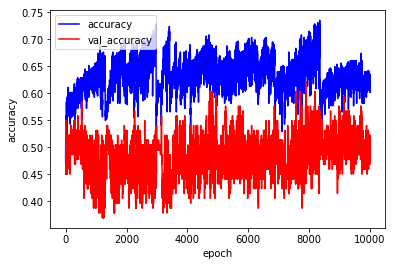

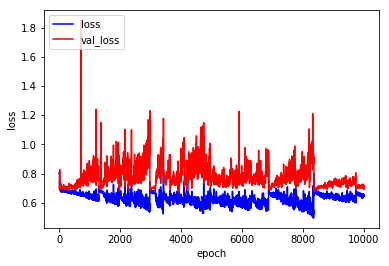

In [5]:
fig, acc_ax  = plt.subplots()
acc_ax.plot(his.history['accuracy'], 'b', label = 'accuracy')
acc_ax.plot(his.history['val_accuracy'], 'r', label = 'val_accuracy')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

fig2, loss_ax = plt.subplots()
loss_ax.plot(his.history['loss'], 'b', label = 'loss')
loss_ax.plot(his.history['val_loss'], 'r', label = 'val_loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')